In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [2]:
# https://gml.noaa.gov/ccgg/trends/data.html
# Mauna Loa CO2 annual mean data( text) or (CSV)
# CO2 data from 1959 to 2015

file = "CO2_DataSet_1.csv"

# Read the  csv and store into Pandas DataFrame
co2_df = pd.read_csv(file, encoding="utf-8")
# co2_df

In [3]:
co2_clean_df = co2_df.iloc[:,[0,1]]
co2_clean_df = co2_clean_df.rename(columns={"year":"Year","mean":"CO2(ppm)"})
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66
61,2020.0,414.24


In [4]:
co2_clean_df.dropna(subset = ['Year'], inplace=True)
co2_clean_df

,Year,CO2(ppm)
0,1959.0,315.98
1,1960.0,316.91
2,1961.0,317.64
3,1962.0,318.45
4,1963.0,318.99
...,...,...
57,2016.0,404.41
58,2017.0,406.76
59,2018.0,408.72
60,2019.0,411.66


In [5]:
# Show data types for all columns 
# co2_clean_df.dtypes

co2_clean_df['Year'] = co2_clean_df.loc[:,'Year'].astype(int)
# co2_clean_df.info()
# co2_clean_df


In [6]:
# https://www.ncei.noaa.gov/access/paleo-search/?dataTypeId=7
# CO2 concentration from ice core samples
# CO2 data from 1000 to 2004

file = "smoothedco2.csv"

# Read the  csv and store into Pandas DataFrame
ice_co2_df = pd.read_csv(file, encoding="utf-8")
ice_co2_df

,Year,ALL_50_full,LD_050,DML_050,ALL_050,LD_075,DML_075,ALL_075,LD_100,DML_100,...,ALL_125,LD_150,DML_150,ALL_150,LD_175,DML_175,ALL_175,LD_200,DML_200,ALL_200
0,1000,278.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,278.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,278.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,278.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,278.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2000,366.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,2001,368.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,2002,369.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,2003,371.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ice_co2_clean_df = ice_co2_df.iloc[:,[0,1]]
ice_co2_clean_df = ice_co2_clean_df.rename(columns={"ALL_50_full":"CO2(ppm)"})
ice_co2_clean_df

,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1000,2000,366.40
1001,2001,368.03
1002,2002,369.66
1003,2003,371.30


In [8]:
# Show data types for all columns 
# ice_co2_clean_df.dtypes


In [9]:
co2_merge = pd.merge(co2_clean_df,ice_co2_clean_df,how='outer',on='Year')
co2_merge = co2_merge.sort_values(by=["Year"])

co2_merge.reset_index(inplace=True) # data1.reset_index(inplace=True)
co2_merge = co2_merge.iloc[:,[1,2,3]]

co2_merge.head(2000)

,Year,CO2(ppm)_x,CO2(ppm)_y
0,1000,NaN,278.66
1,1001,NaN,278.68
2,1002,NaN,278.69
3,1003,NaN,278.71
4,1004,NaN,278.72
...,...,...,...
1016,2016,404.41,NaN
1017,2017,406.76,NaN
1018,2018,408.72,NaN
1019,2019,411.66,NaN


In [10]:
# Average CO2 Values when 2 values exist for a given year
co2_merge["CO2(ppm)"] = co2_merge[['CO2(ppm)_x', 'CO2(ppm)_y']].mean(axis=1)
co2_merge = co2_merge.iloc[:,[0,3]]
co2_merge


,Year,CO2(ppm)
0,1000,278.66
1,1001,278.68
2,1002,278.69
3,1003,278.71
4,1004,278.72
...,...,...
1016,2016,404.41
1017,2017,406.76
1018,2018,408.72
1019,2019,411.66


In [11]:
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
# Global Ave Temp data from 1750 to 2004

file = "GlobalTemperatures.csv"

# Read the  csv and store into Pandas DataFrame
temp_df = pd.read_csv(file, encoding="utf-8")
temp_df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [12]:
temp_df['Year'] = temp_df['dt'].str[:4]
temp_df = temp_df.rename(columns={"LandAverageTemperature":"Temp"})
# temp_df
temp_df = temp_df.loc[:,["Year","Temp"]]
temp_df

,Year,Temp
0,1750,3.034
1,1750,3.083
2,1750,5.626
3,1750,8.490
4,1750,11.573
...,...,...
3187,2015,14.755
3188,2015,12.999
3189,2015,10.801
3190,2015,7.433


In [13]:
# Dataset is monthly (note I stripped the months and only left the year).  
# Average Temp by year
annual_temp=temp_df.groupby('Year').mean()
annual_temp.reset_index(inplace=True)
annual_temp

,Year,Temp
0,1750,8.719364
1,1751,7.976143
2,1752,5.779833
3,1753,8.388083
4,1754,8.469333
...,...,...
261,2011,9.516000
262,2012,9.507333
263,2013,9.606500
264,2014,9.570667


In [14]:
# ice_co2_clean_df.dtypes
annual_temp['Year'] = annual_temp.loc[:,'Year'].astype(int)
co2_merge.dtypes
annual_temp.dtypes


Year      int32
Temp    float64
dtype: object

In [15]:
temp_co2 = pd.merge(co2_merge,annual_temp,how='inner',on='Year')
temp_co2

,Year,CO2(ppm),Temp
0,1750,277.03,8.719364
1,1751,277.02,7.976143
2,1752,277.00,5.779833
3,1753,276.99,8.388083
4,1754,276.99,8.469333
...,...,...,...
261,2011,391.85,9.516000
262,2012,394.06,9.507333
263,2013,396.74,9.606500
264,2014,398.87,9.570667


<AxesSubplot:xlabel='Year', ylabel='Temp'>

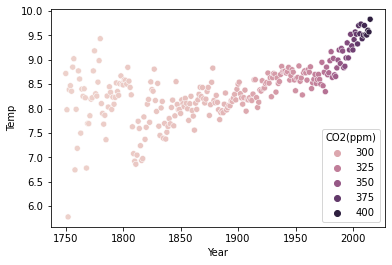

In [16]:
import seaborn as sns
sns.scatterplot(x="Year",y="Temp",hue="CO2(ppm)",data=temp_co2)

<AxesSubplot:xlabel='Year', ylabel='CO2(ppm)'>

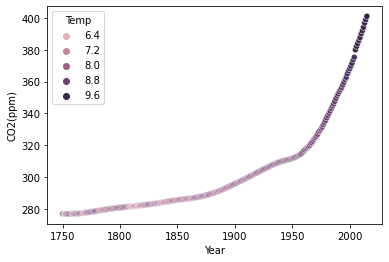

In [17]:
import seaborn as sns
sns.scatterplot(x="Year",y="CO2(ppm)",hue="Temp",data=temp_co2)

<AxesSubplot:xlabel='CO2(ppm)', ylabel='Temp'>

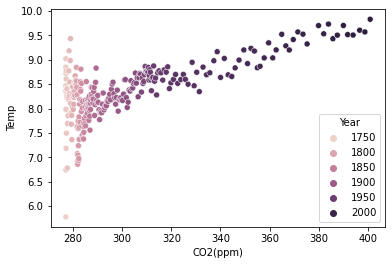

In [18]:
import seaborn as sns
sns.scatterplot(x="CO2(ppm)",y="Temp",hue="Year",data=temp_co2)

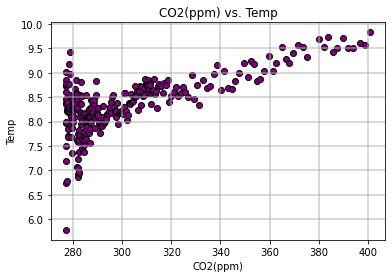

In [19]:
plt.scatter(temp_co2["CO2(ppm)"], temp_co2["Temp"], edgecolor = "black", color = "purple")

plt.title("CO2(ppm) vs. Temp")
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


In [20]:
new_temp_co2=temp_co2[temp_co2["Year"]>=1850]
new_temp_co2

,Year,CO2(ppm),Temp
100,1850,285.77,7.900667
101,1851,285.86,8.178583
102,1852,285.96,8.100167
103,1853,286.05,8.041833
104,1854,286.14,8.210500
...,...,...,...
261,2011,391.85,9.516000
262,2012,394.06,9.507333
263,2013,396.74,9.606500
264,2014,398.87,9.570667


<AxesSubplot:xlabel='CO2(ppm)', ylabel='Temp'>

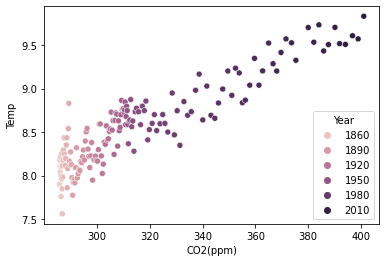

In [21]:
import seaborn as sns
sns.scatterplot(x="CO2(ppm)",y="Temp",hue="Year",data=new_temp_co2)

The r-squared is: 0.8217846179829057


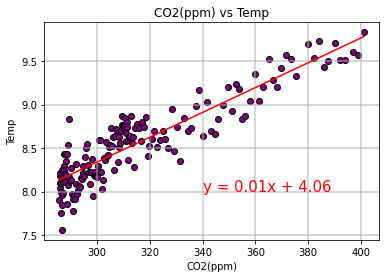

In [22]:
x_values = new_temp_co2['CO2(ppm)']
y_values = new_temp_co2['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Temp")
plt.xlabel("CO2(ppm)")
plt.ylabel("Temp")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [23]:
new_temp_co2.to_csv(r'temp_co2.csv')

In [24]:
#Import natural disaster csv
natural_disaster = pd.read_csv("all_data_combined.csv")
natural_disaster.head()

,Unnamed: 0,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),...,LandAndOceanAverageTemperatureUncertainty,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.150250,6.147500,0.259167,0.480000,7.810000,3.127500,196.724167,8.291667,15.357500,18.570000
1,1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.145750,7.842500,0.310833,0.490000,7.691667,3.136667,254.851667,10.098333,15.948333,22.736667
2,1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.135500,8.416667,0.325833,0.570000,8.182500,3.235000,257.231667,9.944167,17.400833,21.956667
3,1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,...,0.134833,7.211667,0.340833,0.575833,8.285000,3.345833,217.114167,10.285833,17.355000,17.635833
4,1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.133083,7.049167,0.328333,0.508333,8.279167,3.436667,212.654167,9.913333,15.347500,16.290000


In [25]:
# Clean up natural_disaster
natural_disaster = natural_disaster.drop( ['Earthquake (Occurrence)', 'Impact (Occurrence)', 'Landslide (Occurrence)', 
                       'Mass movement (dry) (Occurrence)', 'Volcanic activity (Occurrence)', 
                       'LandAndOceanAverageTemperatureUncertainty', 'SP500', 'Dividend', 'Earnings',
                      'Consumer Price Index', 'Long Interest Rate', 'LandAverageTemperature',
                      'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                      'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                       'Real Price', 'Real Dividend', 'PE10', 'Real Earnings'], axis = 1)

natural_disaster = natural_disaster.rename(columns = {'Unnamed: 0' : 'Year'})

In [26]:
natural_disaster

,Year,All natural disasters (Occurrence),Drought (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Wildfire (Occurrence)
0,1900,5.0,2.0,0.0,1.0,1.0,0.0
1,1901,2.0,0.0,0.0,0.0,0.0,0.0
2,1902,9.0,0.0,0.0,1.0,0.0,0.0
3,1903,8.0,1.0,0.0,2.0,2.0,0.0
4,1904,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
111,2011,334.0,17.0,16.0,84.0,156.0,8.0
112,2012,346.0,21.0,51.0,90.0,136.0,6.0
113,2013,332.0,9.0,14.0,105.0,149.0,10.0
114,2014,320.0,18.0,17.0,99.0,135.0,4.0


In [27]:
# Merge dfs
temp_co2_disaster = pd.merge(natural_disaster, new_temp_co2, how = 'inner', on = 'Year')
temp_co2_disaster

,Year,All natural disasters (Occurrence),Drought (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Wildfire (Occurrence),CO2(ppm),Temp
0,1900,5.0,2.0,0.0,1.0,1.0,0.0,295.90,8.501583
1,1901,2.0,0.0,0.0,0.0,0.0,0.0,296.24,8.541917
2,1902,9.0,0.0,0.0,1.0,0.0,0.0,296.59,8.304417
3,1903,8.0,1.0,0.0,2.0,2.0,0.0,296.93,8.220167
4,1904,2.0,0.0,0.0,1.0,0.0,0.0,297.28,8.090917
...,...,...,...,...,...,...,...,...,...
111,2011,334.0,17.0,16.0,84.0,156.0,8.0,391.85,9.516000
112,2012,346.0,21.0,51.0,90.0,136.0,6.0,394.06,9.507333
113,2013,332.0,9.0,14.0,105.0,149.0,10.0,396.74,9.606500
114,2014,320.0,18.0,17.0,99.0,135.0,4.0,398.87,9.570667


<AxesSubplot:xlabel='Year', ylabel='Temp'>

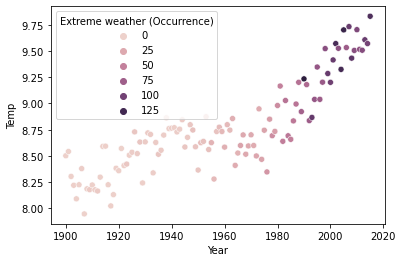

In [28]:
sns.scatterplot(x="Year",y="Temp",hue="Extreme weather (Occurrence)", data=temp_co2_disaster)

<AxesSubplot:xlabel='Year', ylabel='CO2(ppm)'>

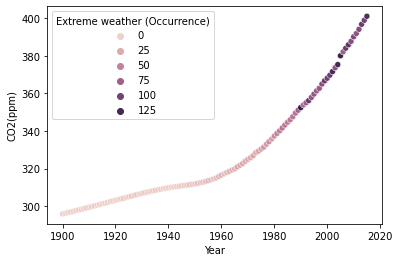

In [29]:
sns.scatterplot(x="Year",y="CO2(ppm)",hue="Extreme weather (Occurrence)",data=temp_co2_disaster)

<AxesSubplot:xlabel='CO2(ppm)', ylabel='Extreme weather (Occurrence)'>

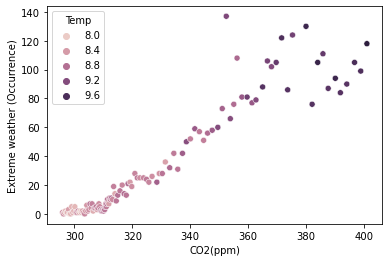

In [30]:
sns.scatterplot(x="CO2(ppm)",y="Extreme weather (Occurrence)", hue = "Temp", data=temp_co2_disaster)

The r-squared is: 0.8978022431388422


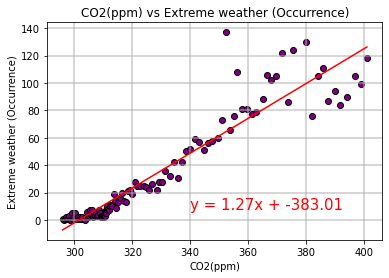

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['Extreme weather (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Extreme weather (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("Extreme weather (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Extreme weather (Occurrence).png')

In [32]:
d1 = temp_co2_disaster[temp_co2_disaster['CO2(ppm)'] <= 350][['CO2(ppm)', 'Extreme weather (Occurrence)']]

The r-squared is: 0.9191711190534589


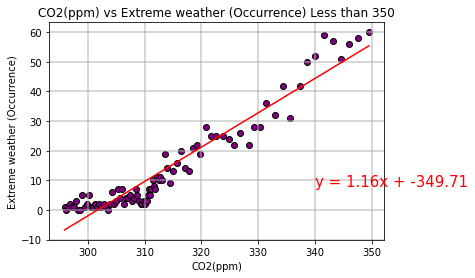

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = d1['CO2(ppm)']
y_values = d1['Extreme weather (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Extreme weather (Occurrence) Less than 350")
plt.xlabel("CO2(ppm)")
plt.ylabel("Extreme weather (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Extreme weather (Occurrence) Less than 350.png')

In [34]:
d2 = temp_co2_disaster[temp_co2_disaster['CO2(ppm)'] > 350][['CO2(ppm)', 'Extreme weather (Occurrence)']]

The r-squared is: 0.06093074927812926


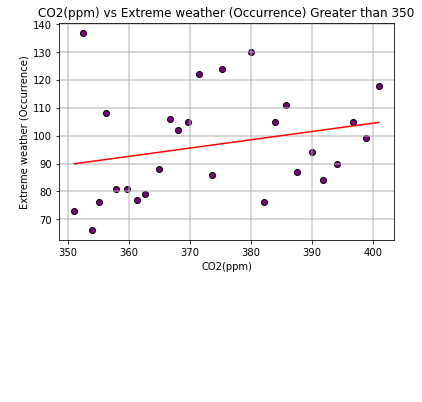

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = d2['CO2(ppm)']
y_values = d2['Extreme weather (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Extreme weather (Occurrence) Greater than 350")
plt.xlabel("CO2(ppm)")
plt.ylabel("Extreme weather (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Extreme weather (Occurrence) Greater than 350.png')

In [36]:
# temp_co2_disaster['flag'] = np.where(temp_co2_disaster['CO2(ppm)']<=350,'less','greater')

# greater = temp_co2_disaster.flag == 'greater'

# less = temp_co2_disaster.flag == 'greater'

# early = temp_co2_disaster.loc[(temp_co2_disaster(['CO2(ppm)'] <= 350.00))]
# co2(ppm)

# # CO2 <= 350
# x_values = early
# y_values = temp_co2_disaster['Extreme weather (Occurrence)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
# plt.title("CO2(ppm) vs Extreme weather (Occurrence)")
# plt.xlabel("CO2(ppm)")
# plt.ylabel("Extreme weather (Occurrence)")
# plt.grid(linestyle='-', linewidth=2, alpha=0.5)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# sns.scatterplot(x="CO2(ppm)",y="Flood (Occurrence)", hue = "Year", data=temp_co2_disaster)

The r-squared is: 0.9314672882696629


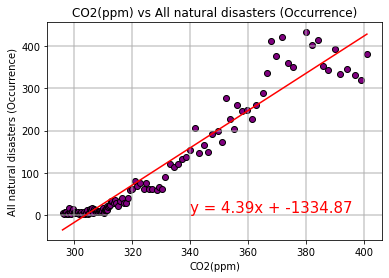

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['All natural disasters (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs All natural disasters (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("All natural disasters (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs All natural disasters (Occurrence).png')

The r-squared is: 0.6725345956530481


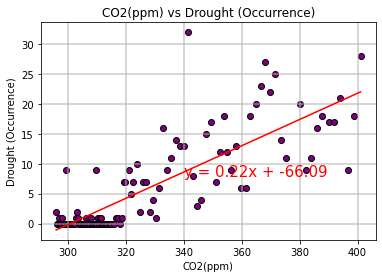

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['Drought (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Drought (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("Drought (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Drought (Occurrence).png')

The r-squared is: 0.6757217907524675


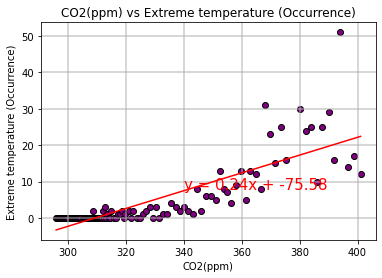

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['Extreme temperature (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Extreme temperature (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("Extreme temperature (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Extreme temperature (Occurrence).png')

The r-squared is: 0.8880638083648622


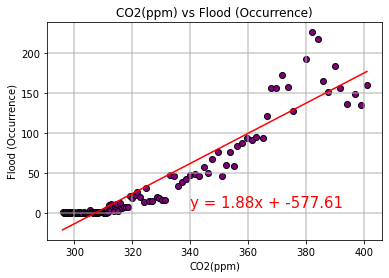

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['Flood (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Flood (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("Flood (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Flood (Occurrence).png')

The r-squared is: 0.5660544933181914


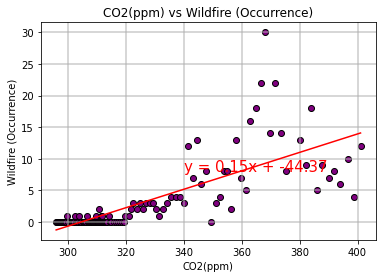

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = temp_co2_disaster['CO2(ppm)']
y_values = temp_co2_disaster['Wildfire (Occurrence)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor = "black", color = "purple")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (340, 8), fontsize=15, color="red")
plt.title("CO2(ppm) vs Wildfire (Occurrence)")
plt.xlabel("CO2(ppm)")
plt.ylabel("Wildfire (Occurrence)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('CO2(ppm) vs Wildfire (Occurrence).png')